In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import numpy as np

from matplotlib import pyplot as plt
from math import floor

trim = 60000
train_images = np.load('../GradientLetters__DiffCircles_60000_32x32.npy')
train_images = train_images.reshape(60000,32,32,1)/255
train_labels = np.load('../GradientLetters_60000_32x32.npy')
train_labels = train_labels.reshape(60000,32*32)/255






In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dense(32*32, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

In [20]:
model.fit(train_images, train_labels, epochs=10)

test_images = np.load('../GradientLetters__DiffCircles_6000_32x32.npy').reshape(6000,32,32,1)/255
predictions = model.predict(test_images)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 226s 4ms/sample - loss: 0.0255 - accuracy: 0.4695
Epoch 2/10
60000/60000 [==============================] - 243s 4ms/sample - loss: 0.0251 - accuracy: 0.4613
Epoch 3/10
60000/60000 [==============================] - 267s 4ms/sample - loss: 0.0248 - accuracy: 0.4570
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/sample - loss: 0.0246 - accuracy: 0.4568
Epoch 5/10
60000/60000 [==============================] - 223s 4ms/sample - loss: 0.0245 - accuracy: 0.4637
Epoch 6/10
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.0243 - accuracy: 0.4653
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.0241 - accuracy: 0.4664
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.0240 - accuracy: 0.4674
Epoch 9/10
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.0238 - accuracy: 0.4694
Epoch

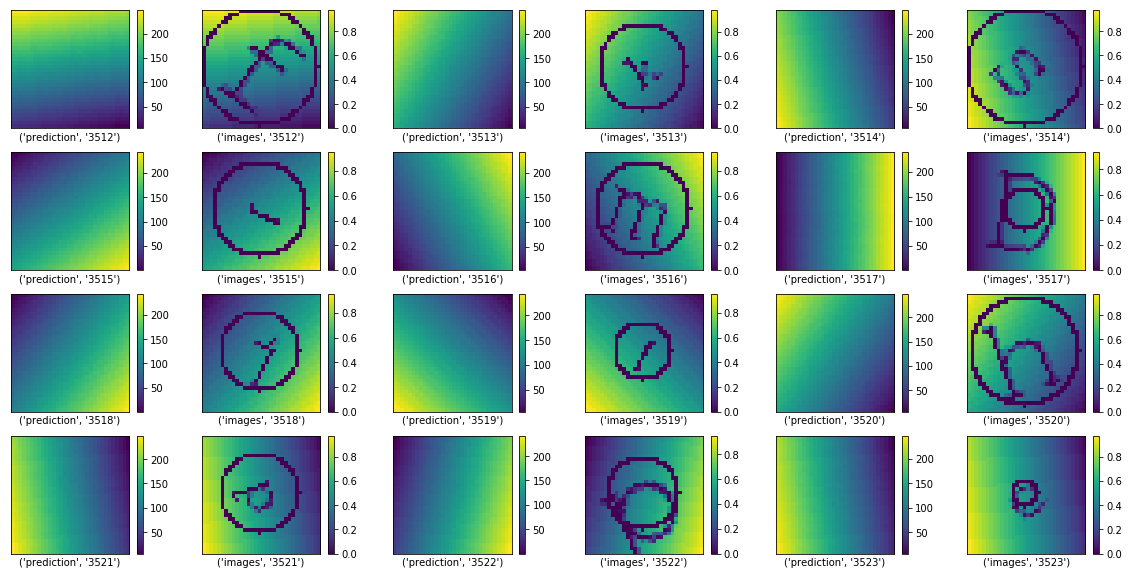

In [21]:


num_imx,num_imy  = 6,4
num_im = num_imx*num_imy

plt.figure(figsize=(20,10))
for i in range(num_im):
    plt.subplot(num_imy,num_imx,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind = 3512+floor(i/2)
    if i%2 == 0:
        im = predictions[ind].reshape(32,32)*255
        label = 'prediction',str(ind)
    else:
        #im = test_labels[ind]
        #label = 'ref',str(ind)
        im = test_images[ind].reshape(32,32)
        label = 'images',str(ind)
    plt.imshow(im)
    plt.xlabel(label)
    plt.colorbar()
plt.show()


In [11]:
model.save('my_model.h5')